In [39]:
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/content/wisc_bc_data.csv', encoding='utf-8')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [5]:
# 2. Age-Thal : 설명변수
# 3. AHD : 종속변수

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split (
    df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']],
    df['diagnosis'],
    test_size=0.2,
    random_state=42
)

In [7]:
X_train.shape, Y_train.shape

((455, 30), (455,))

In [8]:
X_test.shape, Y_test.shape

((114, 30), (114,))

In [9]:
# 단일 모델들에 대한 객체 생성
# voting(hard/soft)

In [10]:
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth = 3,
    max_features = 8,
    random_state = 100
)

In [11]:
svc = SVC (
    kernel='rbf',
    C=0.1, # C : 0.1 ~ 1
    gamma=0.003,
    probability=True,
    random_state=100
)

In [12]:
lr = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None
)

In [13]:
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_test)

In [14]:
svc.fit(X_train, Y_train)
svc_predicted = svc.predict(X_test)

In [15]:
lr.fit(X_train, Y_train)
lr_predicted = lr.predict(X_test)

In [16]:
print('accuracy=====================')
print('dt >>', accuracy_score(Y_test, dt_predicted))
print('svc >>', accuracy_score(Y_test, svc_predicted))
print('lr >>', accuracy_score(Y_test, lr_predicted))

accuracy=====================
dt >> 0.9649122807017544
svc >> 0.6491228070175439
lr >> 0.9736842105263158


In [17]:
# hard voting
voting_clf1 = VotingClassifier(
    estimators=[('decision tree', dt), ('svc', svc), ('lr', lr)],
    weights=[1, 1, 1], # 가중치
    voting='hard' # voting 방식
)

In [18]:
voting_clf1.fit(X_train, Y_train)
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(Y_test, hard_voting_predicted)

0.9649122807017544

In [19]:
# soft voting
voting_clf2 = VotingClassifier(
    estimators=[('decision tree', dt), ('svc', svc), ('lr', lr)],
    weights=[1, 1, 1], # 가중치
    voting='soft' # voting 방식
)

In [20]:
voting_clf2.fit(X_train, Y_train)
soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(Y_test, soft_voting_predicted)

0.9824561403508771

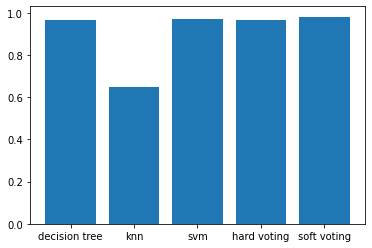

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(5)
bars = plt.bar(x, height= [accuracy_score(Y_test, dt_predicted),
                    accuracy_score(Y_test, svc_predicted),
                    accuracy_score(Y_test, lr_predicted),
                    accuracy_score(Y_test, hard_voting_predicted),
                    accuracy_score(Y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);

In [33]:
## bagging
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [34]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_predt)
rf_acc

0.9736842105263158

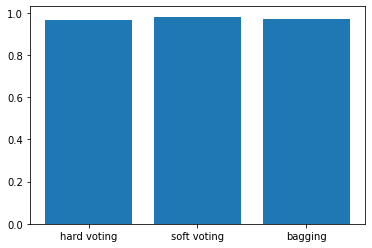

In [38]:
x = np.arange(3)
plt.bar(x, height= [accuracy_score(Y_test, hard_voting_predicted),
                    accuracy_score(Y_test, soft_voting_predicted),
                    accuracy_score(Y_test, rf_predt)]
        )
plt.xticks(x, ['hard voting','soft voting', 'bagging']);

In [40]:
confusion_matrix(Y_test, hard_voting_predicted)

array([[73,  1],
       [ 3, 37]])

In [47]:
# b: 양성, m: 악성
# 정상이 74명인데, 73명만 정상, 1명은 암환자
# 암환자가 40명인데, 37명만 암환자, 3명은 정상

In [41]:
confusion_matrix(Y_test, soft_voting_predicted)

array([[73,  1],
       [ 1, 39]])

In [44]:
# b: 양성, m: 악성
# 정상이 74명인데, 73명만 정상, 1명은 암환자
# 암환자가 40명인데, 39명만 암환자, 1명은 정상
# recall(재현률)이 bagging보다는 낮은 편

In [42]:
confusion_matrix(Y_test, rf_predt)

array([[72,  2],
       [ 1, 39]])

In [45]:
# b: 양성, m: 악성
# 정상이 74명인데, 72명만 정상, 2명은 암환자
# 암환자가 40명인데, 39명만 암환자, 1명은 정상
# recall(재현률)이 soft-voting보다는 높은 편

In [46]:
# softvoting model보다는 bagging 모델을 선택하는 것이 좋음

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [50]:
gbc = GradientBoostingClassifier(
    random_state=42
    ).fit(X_train, Y_train)

In [51]:
hist = HistGradientBoostingClassifier(
    random_state=42
    ).fit(X_train, Y_train)

In [54]:
xgb = XGBClassifier(
    random_state=42,
    tree_method='hist'
    ).fit(X_train, Y_train)

In [53]:
lgbm = LGBMClassifier(
    random_state=42
    ).fit(X_train, Y_train)

In [55]:
gbc_predicted = gbc.predict(X_test)
accuracy_score(Y_test, gbc_predicted)

0.9824561403508771

In [56]:
hist_predicted = hist.predict(X_test)
accuracy_score(Y_test, hist_predicted)

0.9824561403508771

In [57]:
xgb_predicted = xgb.predict(X_test)
accuracy_score(Y_test, xgb_predicted)

0.9824561403508771

In [58]:
lgbm_predicted = lgbm.predict(X_test)
accuracy_score(Y_test, lgbm_predicted)

0.9824561403508771

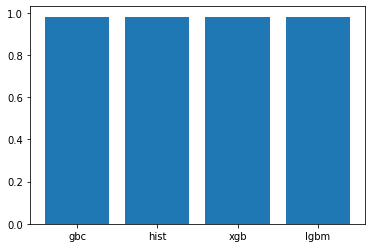

In [60]:
x = np.arange(4)
plt.bar(x, height= [accuracy_score(Y_test, gbc_predicted),
                    accuracy_score(Y_test, hist_predicted),
                    accuracy_score(Y_test, xgb_predicted),
                    accuracy_score(Y_test, lgbm_predicted)
        ])
plt.xticks(x, ['gbc','hist', 'xgb', 'lgbm']);

In [61]:
confusion_matrix(Y_test, xgb_predicted)

array([[73,  1],
       [ 1, 39]])

In [62]:
# xgboost는 암환자 40명 중 39명을 찾아냈고, 1명을 찾아내지 못했다.
# recall(재현률)이 높으므로 xgboost model이 암환자를 가려내는데 적합하다

In [43]:
%%shell
jupyter nbconvert --to html /content/질병예측_암데이터_앙상블.ipynb # 파일 html로 저장

[NbConvertApp] Converting notebook /content/질병예측_암데이터_앙상블.ipynb to html
[NbConvertApp] Writing 327014 bytes to /content/질병예측_암데이터_앙상블.html
